In [1]:
!rm -rf filtered.tsv
!rm -rf filtered_paranmt.zip

In [2]:
!gdown 1Y9Cv53r7dDs3whEHLD9Eipw-RezwS2Tn

Downloading...
From: https://drive.google.com/uc?id=1Y9Cv53r7dDs3whEHLD9Eipw-RezwS2Tn
To: /content/filtered_paranmt.zip
100% 44.4M/44.4M [00:00<00:00, 132MB/s]


In [3]:
%%capture
!unzip filtered_paranmt.zip

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
filtered = pd.read_table('filtered.tsv')
filtered = filtered.drop([filtered.columns[i] for i in [0]], axis=1)

In [6]:
filtered.head()

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


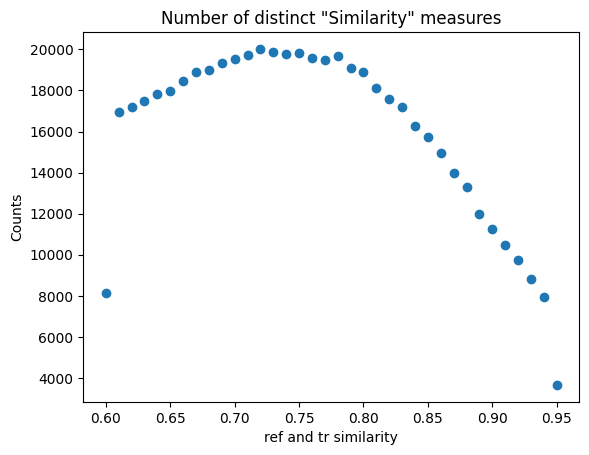

In [7]:
similarities = filtered['similarity'].values.round(2)
unique, counts = np.unique(similarities, return_counts=True)

plt.ylabel('Counts')
plt.xlabel('ref and tr similarity')
plt.title('Number of distinct "Similarity" measures')
plt.scatter(unique, counts)
plt.show()

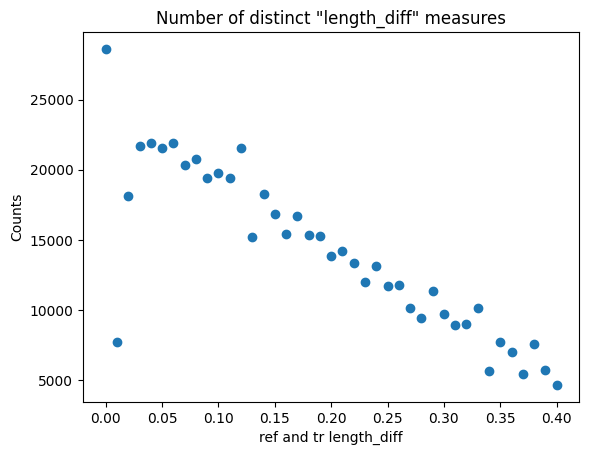

In [8]:
lengths = filtered['lenght_diff'].values.round(2)
unique, counts = np.unique(lengths, return_counts=True)

plt.ylabel('Counts')
plt.xlabel('ref and tr length_diff')
plt.title('Number of distinct "length_diff" measures')
plt.scatter(unique, counts)
plt.show()

Translation quality seems weird for me in this dataset, so I will try to find another one

In [9]:
for i in range(10):
    idx = np.random.randint(0, len(filtered) - 1)
    print(f"{filtered.iloc[idx]['ref_tox']:.3f}, ': ', {filtered.iloc[idx, 0]}")
    print(f"{filtered.iloc[idx]['trn_tox']:.3f}, ': ', {filtered.iloc[idx, 1]}\n")

0.996, ': ', Pray you, if you should cross paths once again, that you strike at him mercilessly so that he is screwed.
0.000, ': ', I hope that when you meet him again, you will have no mercy on him to be in trouble.

0.999, ': ', All because of some stupid fight with Miles?
0.000, ': ', all for a little bit of a mix-up with Miles?

0.006, ': ', "Solid shot only," he murmured over his com.
0.836, ': ', "you only shoot at the necessary," he muttered into the com.

0.926, ': ', I'd rather be... insane and alive. Then sane... and dead.
0.070, ': ', I'd rather be crazy, but alive than sane and dead

0.114, ': ', The Jew shall have all justice.
0.866, ': ', the Jew will only get the same justice.

0.000, ': ', So Pat says... He says "They got this new bar... and you go inside, and for half a buck you get a beer, a free lunch... they take you in the back room and get you laid."
0.999, ': ', and Pat says, "I know a new bar when you come in, you get a beer for half a dollar, they'll take your 

#New dataset exploration

In [10]:
!wget https://huggingface.co/datasets/s-nlp/paradetox/resolve/main/train.tsv

--2023-10-10 12:13:25--  https://huggingface.co/datasets/s-nlp/paradetox/resolve/main/train.tsv
Resolving huggingface.co (huggingface.co)... 13.33.33.55, 13.33.33.102, 13.33.33.110, ...
Connecting to huggingface.co (huggingface.co)|13.33.33.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2039815 (1.9M) [text/plain]
Saving to: ‘train.tsv.1’

train.tsv.1         100%[===================>]   1.95M  8.53MB/s    in 0.2s    

2023-10-10 12:13:26 (8.53 MB/s) - ‘train.tsv.1’ saved [2039815/2039815]



In [11]:
data = pd.read_table('../data/external/paradetox.tsv')
data.rename(columns={"en_toxic_comment": "reference", "en_neutral_comment": 'translation'}, inplace=True)
data.head()

,reference,translation
0,he had steel balls too !,he was brave too!
1,"dude should have been taken to api , he would ...",It would have been good if he went to api. He ...
2,"im not gonna sell the fucking picture , i just...","I'm not gonna sell the picture, i just want to..."
3,the garbage that is being created by cnn and o...,the news that is being created by cnn and othe...
4,the reason they dont exist is because neither ...,The reason they don't exist is because neither...


This dataset seems to be much better in terms of translation quality, as it was comprised using crowdsourcing

In [12]:
for i in range(10):
    idx = np.random.randint(0, len(data) - 1)
    print(f"{data.iloc[idx, 0]}")
    print(f"{data.iloc[idx, 1]}\n")

you 're full of shit , and should feel bad for lying .
You're lying and you should feel bad for it.

dont be sending that trash to hell with the rest of us cool people .
Please don't send me any information

it 's just a shit country that has no way out .
It's a country that has no way out.

this village idiot needs a long stay in the gitmo asylum .
He needs a longer stay at the asylum.

in response to your last paragraph rubbish .
In response to your last paragraph, not good.

damn how 'd u know ? ! i woke up in a bomb ass mood ! ! ! ! !
how do u know? I woke up in a great mood

feds tellin me i cant shit in my own water
The Fed tells me I can't mess with my water.

my website is soo shit < < what did u used to use ?
my website is so bad. what did you used to use?

that 's why i said , " why the fuck do we need shit .
That's why I said, " why we need it".

i been on my hooping shit
i been on my hooping

